# 0.0. IMPORTS

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from IPython.core.display import HTML


## 0.1. HELPER FUNCTIONS

In [64]:
def jupyter_settings():
    %matplotlib inline
    #%pylab inline
    
    plt.style.use( 'ggplot' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24
    
    display(HTML ('<style>.container { width:97% !important; } </style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows=50
    pd.set_option('display.expand_frame_repr', False)
       
    sns.set()
    
jupyter_settings()

plt.rcParams['figure.figsize'] = (15, 10)

## 0.2. LOADING DATA

In [29]:
path = '../data/train.csv'
data_raw = pd.read_csv(path)
data_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# 1.0. PASSO 01 - DATA DESCRIPTION

In [30]:
df1 = data_raw.copy()
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 1.1. DATA DIMENSIONS

In [31]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 381109
Number of columns: 12


## 1.2. RENAME COLUMNS

In [32]:
df1.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [33]:
df1.columns = df1.columns.to_series().str.lower()
df1.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

## 1.3. DATA TYPES

In [34]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.4. CHECK NA

In [36]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.5. DESCRIPTIVE STATISTICS

In [37]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64'])

### 1.5.1. NUMERICAL ATTRIBUTES

In [47]:
descriptive_num = num_attributes.describe().T
descriptive_num['range'] = descriptive_num['max'] - descriptive_num['min']
descriptive_num['skew'] = num_attributes.skew()
descriptive_num['kurtosis'] = num_attributes.kurtosis()
descriptive_num = descriptive_num.rename(columns = {'50%': 'median'})
descriptive_num = descriptive_num[['min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']]
descriptive_num

,min,max,range,mean,median,std,skew,kurtosis
id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.836208,9.443274e-16,-1.200000
age,20.0,85.0,65.0,38.822584,36.0,15.511611,6.725390e-01,-0.565655
driving_license,0.0,1.0,1.0,0.997869,1.0,0.046110,-2.159518e+01,464.354302
region_code,0.0,52.0,52.0,26.388807,28.0,13.229888,-1.152664e-01,-0.867857
previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.155057,1.766087e+00,34.004569
policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203995,-9.000081e-01,-0.970810
vintage,10.0,299.0,289.0,154.347397,154.0,83.671304,3.029517e-03,-1.200688
response,0.0,1.0,1.0,0.122563,0.0,0.327936,2.301906e+00,3.298788


### 1.5.2. CATEGORICAL ATTRIBUTES

In [48]:
cat_attributes.head()

,gender,vehicle_age,vehicle_damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


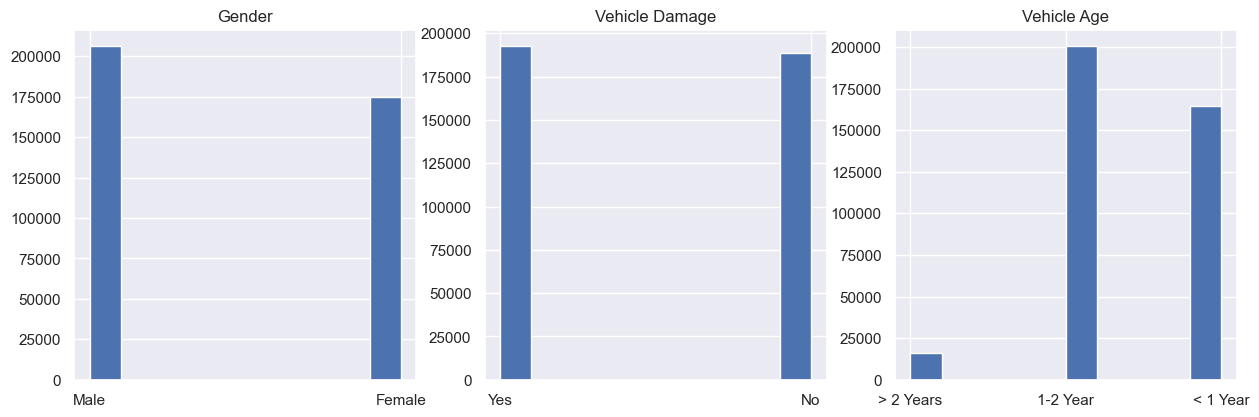

In [69]:
grid = GridSpec(2, 3)

plt.subplot(grid[0, 0])
cat_attributes['gender'].hist().set_title('Gender')

plt.subplot(grid[0, 1])
cat_attributes['vehicle_damage'].hist().set_title('Vehicle Damage')

plt.subplot(grid[0, 2])
cat_attributes['vehicle_age'].hist().set_title('Vehicle Age');

# 2.0. PASSO 02 - FEATURE ENGINEERING

In [70]:
df2 = df1.copy()